---
### Libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap

#### Generating data

In [2]:
# We will pick 5 values centered from [0,1] and 5 values centered from [1,0].
# these will be centers of gaussian values of two classes of data.
N=10
x1,y1 = np.random.multivariate_normal(mean=[0,1], cov = [[0.1, 0], [0, 0.1]], size=N).T
x2,y2 = np.random.multivariate_normal(mean=[1,0], cov = [[0.1, 0], [0, 0.1]], size=N).T

# generate_data will generate data for you.  It will return two matrices, 
#  one for class 0 and another for class 1.  It will also return two vectors: one 
#  for each of the labels.
def generate_data(N):
    x_0 = np.array([np.random.multivariate_normal(mean=[a,b], cov = [[0.2, 0], [0, 0.2]], size=N) for (a,b) in zip(x2,y2)]).reshape(-1, 2)
    x_1 = np.array([np.random.multivariate_normal(mean=[a,b], cov = [[0.2, 0], [0, 0.2]], size=N) for (a,b) in zip(x1,y1)]).reshape(-1, 2)
    return x_0, x_1, [0]*x_0.shape[0], [1]*x_1.shape[0]

N = 100
a0,a1,b0,b1 = generate_data(N)
g0,g1,gb0,gb1 = generate_data(N)
g0_arr = []
g1_arr = []
gb0_arr = []
gb1_arr = []
for i in range(0,10):
    g0,g1,gb0,gb1 = generate_data(N)
    g0_arr.append(g0)
    g1_arr.append(g1)
    gb0_arr.append(gb0)
    gb1_arr.append(gb1)
    
    
print(np.shape(g0_arr))
    
#mean 1/(x.shape[0])* np.sum((y(x)-y)**2)

(10, 1000, 2)


#### Plot the data

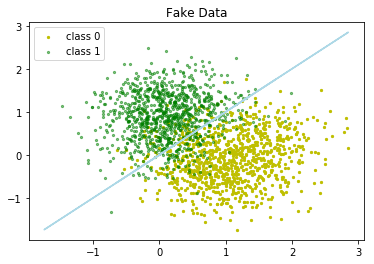

In [3]:
# lets plot the data
plt.title('Fake Data')
#plot the generated data
plt.scatter(a0[:,0], a0[:,1], alpha=1, color='y', s=5, label = 'class 0')
plt.scatter(a1[:,0], a1[:,1], alpha=0.5, color='g', s=5, label = 'class 1')

plt.legend()
# plot the "ideal" decision boundary (corresponding to the generation method)
plt.plot(a0, a0, c='lightblue')
plt.show()

#### Combine data to create training data

In [4]:
# our training data is a combination of a0 and a1, together with the class targets b0 and b1
x_train = np.concatenate((a0,a1), axis=0)
y_train = np.concatenate((b0,b1), axis=0)
#xg_train = np.concatenate((g0,g1), axis=0)
#yg_train = np.concatenate((gb0,gb1), axis=0)
print(x_train.shape)
x_train_array = []
y_train_array = []
for i in range(0,10):
    x_train_array.append(np.concatenate((g0_arr[i], g1_arr[i]), axis=0))
    y_train_array.append(np.concatenate((gb0_arr[i], gb1_arr[i]), axis=0))
    
for i in range(0,10):
    y_train_array[i][:1000] = -1
    
#set first 1000 to -1
y_train[:1000] = -1
#yg_train[:1000] = -1

(2000, 2)


---
### Pocket algorithm

#### $E_{in}$ function

In [5]:
def E_in(w, x, y):
    return np.sum(np.abs(np.sign(np.dot(x,w)) - y));

In [79]:
def MSE_pla(w, x, y):
    return E_in(w,x,y)/len(x)

In [6]:
def classify(w, x, y):
    class0 = []
    class1 = []
    for x_ in x:
        if np.sign(np.dot(x_,w)) < 0:
            class0.append(x_);
        else:
            class1.append(x_);
    return class0, class1    

#### Pick $x$ to update $\overline{w}$

In [7]:
def x_choose(w, x, y):
    error = np.sign(np.dot(x,w)) - y;
    error_not_null = np.asarray(error).nonzero()
    return np.random.choice(error_not_null[0],1)


#### Update $\overline{w}$ using $x$

In [8]:
def pla(w, x, y):
    index = x_choose(w, x, y)
    return w + np.dot(y[index], x[index])

#### Randomize $\overline{w}$

In [9]:
w = np.random.uniform(size = 2)
w_p = w
print(w)

[0.51392551 0.55984854]


#### Train hypotysis using pocket algorithm

In [10]:
for i in range(0,1000):
    w = pla(w, x_train, y_train)
    if E_in(w ,x_train, y_train) < E_in(w_p,x_train, y_train):
        w_p = w

#### Results

In [83]:
print("w:",w_p)
print("Miss-classified:", E_in(w_p, x_train, y_train))
print("Miss-classified on new data:", E_in(w_p, x_train_array[0], y_train_array[0]))
print('MSE:', MSE_pla(w_p, x_train_array[0], y_train_array[0]))
line = np.dot(x_train, w_p)

w: [-1.91315506  2.07244478]
Miss-classified: 406.0
Miss-classified on new data: 390.0
MSE: 0.195


#### Plot decision boundary

In [13]:
linsp = np.linspace(np.min(x_train), np.max(x_train), 2000)
slope = -w_p[0]/w_p[1]
y_plot = slope*linsp 

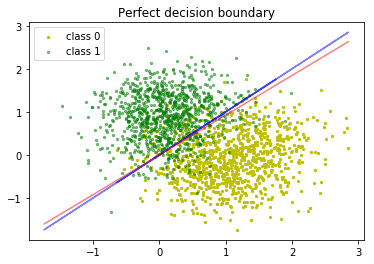

------------------------------------------------
	Data set: 1
	MSE: 0.195


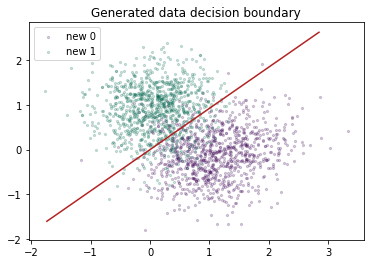

------------------------------------------------
	Data set: 2
	MSE: 0.201


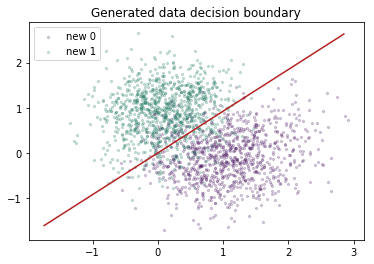

------------------------------------------------
	Data set: 3
	MSE: 0.206


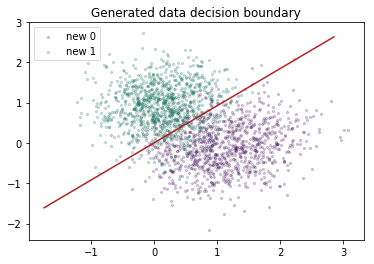

------------------------------------------------
	Data set: 4
	MSE: 0.206


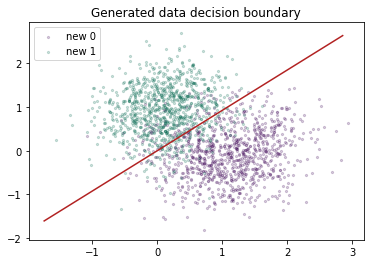

------------------------------------------------
	Data set: 5
	MSE: 0.205


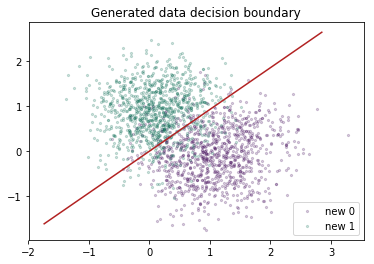

------------------------------------------------
	Data set: 6
	MSE: 0.221


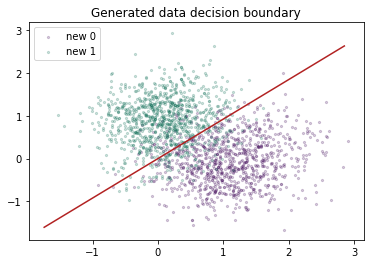

------------------------------------------------
	Data set: 7
	MSE: 0.18


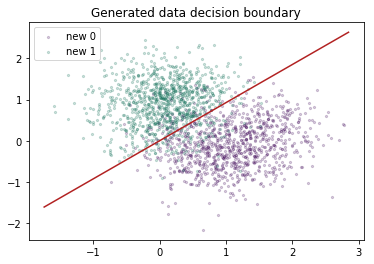

------------------------------------------------
	Data set: 8
	MSE: 0.22


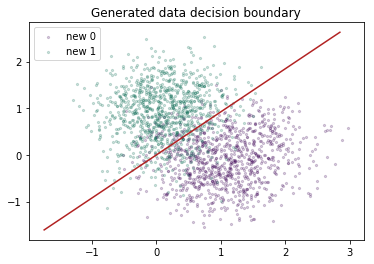

------------------------------------------------
	Data set: 9
	MSE: 0.212


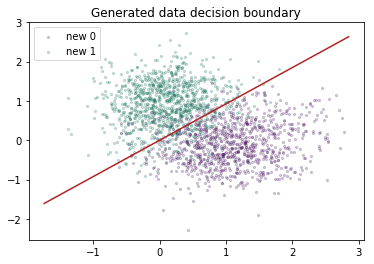

------------------------------------------------
	Data set: 10
	MSE: 0.205


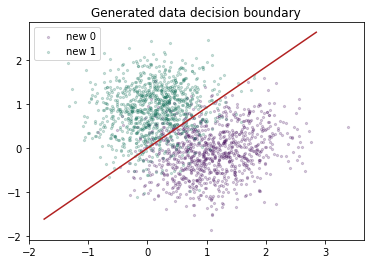

------------------------------------------------


In [87]:
plt.title('Perfect decision boundary')
#plot the generated data
plt.scatter(a0[:,0], a0[:,1], alpha=1, color='y', s=5, label = 'class 0')
plt.scatter(a1[:,0], a1[:,1], alpha=0.5, color='g', s=5, label = 'class 1')
plt.plot(a0, a0, c='blue', alpha = 0.5)
plt.plot(linsp, y_plot, c='r', alpha = 0.5)
plt.legend()
plt.show()
print('------------------------------------------------')
for i in range(0,10):
    print('\tData set:', i+1)
    print('\tMSE:',  MSE_pla(w_p, x_train_array[i], y_train_array[i]))
    plt.title('Generated data decision boundary')
    #generated data
    plt.scatter(g0_arr[i][:,0], g0_arr[i][:,1], alpha=0.2, color='#3b0053', s=5, label = 'new 0')
    plt.scatter(g1_arr[i][:,0], g1_arr[i][:,1], alpha=0.2, color='#03674f', s=5, label = 'new 1')
    # plot the "ideal" decision boundary (corresponding to the generation method)
    plt.plot(linsp, y_plot, c='#b22222', alpha = 1)
    plt.legend()
    plt.show()
    print('------------------------------------------------')

### KNN

In [15]:
def distance(x_target, x_train):
    D = []
    for x_t in x_train:
        D.append(np.linalg.norm(x_target - x_t))
    return D

In [16]:
def KNN(x_new, x_train, y_train, k):
    y_new = []
    array_min = []
    classifier_value = 0
    for x_n in x_new:
        D = distance(x_n, x_train)
        array_min = []
        for i in range(0, k):
            min_d = np.argmin(D)
            array_min.append(min_d)
            D[min_d] = 10000000000000000
        classifier_value = 0
        for y in array_min:
            classifier_value += y_train[y]
        if classifier_value >= 0:
            y_new.append(1)
        else:
            y_new.append(-1)
    return y_new    

In [57]:
def missclassified_knn(y, y_train):
    return np.sum(np.abs(y - y_train))

In [48]:
def MSE_knn(y, y_train):
    return missclassified_knn(y, y_train)/len(y)

In [49]:
output = KNN(x_train_array[0], x_train, y_train, 3)


In [58]:
print("Miss-classified by KNN:",missclassified_knn(output, y_train_array[0]))
print('MSE for knn', MSE_knn(output, y_train_array[0]))

Miss-classified by KNN: 468
MSE for knn 0.234


In [22]:
def predict(array, k):
    return KNN(array, x_train, y_train, k)

----------------------------------------
	Generated data:  1  batch k = 3
	MSE: 0.234


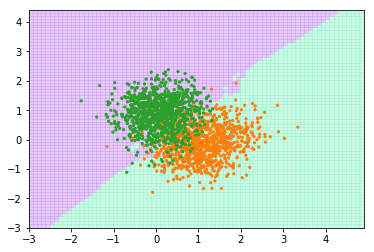

----------------------------------------
	Generated data:  2  batch k = 3
	MSE: 0.239


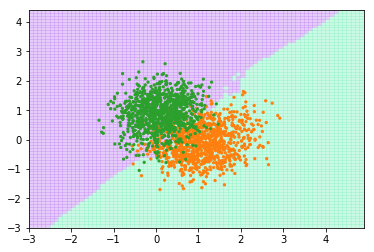

----------------------------------------
	Generated data:  3  batch k = 3
	MSE: 0.227


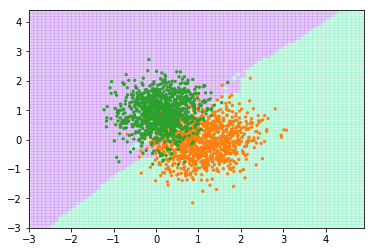

----------------------------------------
	Generated data:  4  batch k = 3
	MSE: 0.239


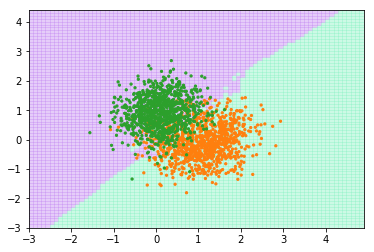

----------------------------------------
	Generated data:  5  batch k = 3
	MSE: 0.226


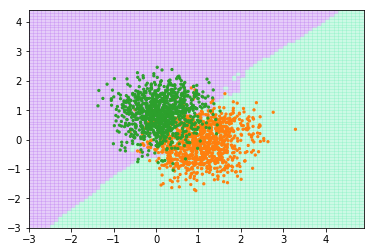

----------------------------------------
	Generated data:  6  batch k = 3
	MSE: 0.265


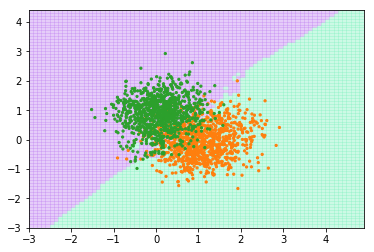

----------------------------------------
	Generated data:  7  batch k = 3
	MSE: 0.232


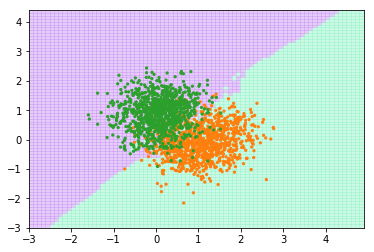

----------------------------------------
	Generated data:  8  batch k = 3
	MSE: 0.25


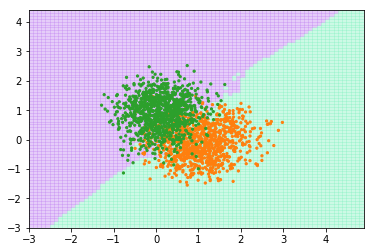

----------------------------------------
	Generated data:  9  batch k = 3
	MSE: 0.233


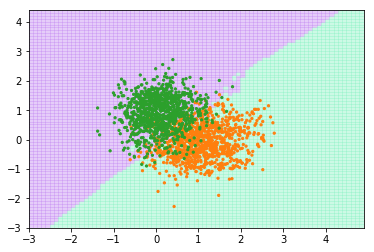

----------------------------------------
	Generated data:  10  batch k = 3
	MSE: 0.227


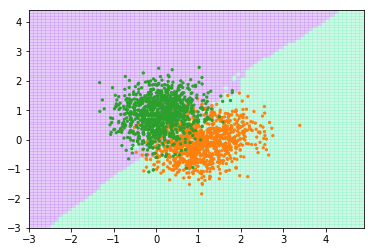

----------------------------------------


In [92]:
# a procedure for generating a meshgrid plot of the decision boundary of our classifiers.
def decisionBoundary(ax, k):
#    x_min, x_max = -0.1, 1.1
#    y_min, y_max = -0.1, 1.1
    x_min, x_max = -3, 5
    y_min, y_max = -3, 4.5
    h = 0.1  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()], k)
   
    Z = np.reshape(Z, xx.shape)
    # Put the result into a color plot
    #Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#9af4cc', '#AAFFAA', '#cc9af4'])
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.5)

    return ax
   
# now we will create a procedure for the scatterplot as well as it is boilerplate code
def plot_points(ax, x_train, y_train, title = None):
    if title is not None:
        ax.set_title(title)
    # map color to target values (y_train)
    color = np.array(['C0', 'C2', 'C1'])[y_train]
    ax.scatter(np.squeeze(np.asarray(x_train[:,0])), np.squeeze(np.asarray(x_train[:,1])), c=color, s=5, alpha=1)
    return ax

print('----------------------------------------')
for i in range(0,10):    
    print('\tGenerated data: ', i+1, ' batch k =', k)
    k = 3
    output = KNN(x_train_array[i], x_train, y_train, k)
    print('\tMSE:', MSE_knn(output, y_train_array[i]))
    f, ax = plt.subplots()
    ax = decisionBoundary(ax, k)
    ax = plot_points(ax, x_train_array[i], y_train_array[i])
    plt.show()
    print('----------------------------------------')